# Autor: Duver Ivan Lectamo Silva
# C4 Integligencia artificial nivel innovador

Modelo que aprende a jugar un juego simple de Piedra, Papel o Tijera contra un oponente con un patrón predecible.

Este modelo de RNN intentará predecir la próxima jugada del oponente basándose en la secuencia de jugadas anteriores. Esto simula cómo un jugador humano podría intentar detectar patrones en el juego de su oponente

Import librerias

In [122]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos los datos

In [123]:
data = pd.read_csv('rps_generated.csv')
moves = ['PI', 'PA', 'TI']
move_to_index = {move: i for i, move in enumerate(moves)}
index_to_move = {i: move for move, i in move_to_index.items()}

In [124]:
data


,game_id,move_id,p1,p2
0,0,0,TI,PI
1,0,1,TI,PI
2,0,2,PI,TI
3,0,3,PI,PI
4,0,4,PI,PI
...,...,...,...,...
199995,1999,95,TI,PA
199996,1999,96,PA,PI
199997,1999,97,PI,PA
199998,1999,98,PI,PI


# Preparamos los datos para entrenar la red (RNN)

*   data: Es el DataFrame que contiene todos los movimientos de todas las partidas.
*   seq_length: Es la longitud de la secuencia que queremos usar para predecir el siguiente movimiento.
*   X. almacenará las secuencias de entrada.
*   y. almacenará los movimientos objetivo (el movimiento que sigue a cada secuencia).

Ejemplo concreto:
Supongamos que tenemos una partida con los movimientos: ['PI', 'PA', 'TI, 'PI', 'PA', 'TI', 'PI']

Con seq_length = 5,

generaríamos:

X[0] = [0, 1, 2, 0, 1] (correspondiente a ['PI', 'PA', 'TI', 'PI', 'PA'])

y[0] = 2 (correspondiente a 'S')

X[1] = [1, 2, 0, 1, 2] (correspondiente a ['PA', 'TI', 'PI', 'PA', 'TI'])

y[1] = 0 (correspondiente a 'R')

Esto permite que la RNN aprenda a predecir el siguiente movimiento basándose en los 5 movimientos anteriores.



In [125]:
def prepare_sequences(data, seq_length):
    X, y = [], []
    for _, game in data.groupby('game_id'):
        moves = game['p1'].tolist()
        for i in range(len(moves) - seq_length):
            X.append([move_to_index[m] for m in moves[i:i+seq_length]])
            y.append(move_to_index[moves[i+seq_length]])
    return np.array(X), np.array(y)

seq_length = 5
X, y = prepare_sequences(data, seq_length)

# Dividir los datos en conjuntos de entrenamiento y prueba

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Reshape X para que sea compatible con LSTM: (muestras, time steps, features)

In [127]:
# X_train = X_train.reshape((X_train.shape[0], seq_length, 1))
# X_test = X_test.reshape((X_test.shape[0], seq_length, 1))

# Ahora podemos determinar n_features
n_features es el número de características para cada paso de tiempo en la secuencia.

In [128]:
# n_features = X_train.shape[2]

# Crear el modelo RNN

In [129]:
model = Sequential([
    LSTM(64, input_shape=(seq_length, 1), return_sequences=True),
    LSTM(32),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')

])


# def create_model(seq_length, n_features):
#     model = Sequential([
#         LSTM(128, input_shape=(seq_length, n_features), return_sequences=True, kernel_regularizer=l2(0.01)),
#         Dropout(0.3),
#         LSTM(64, return_sequences=False),
#         Dropout(0.3),
#         Dense(32, activation='relu'),
#         Dense(3, activation='softmax')
#     ])
#     model.compile(optimizer=Adam(learning_rate=0.001),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model


# def create_model(seq_length, n_features):
#    model = Sequential([
#        LSTM(32, input_shape=(seq_length, n_features), return_sequences=False),
#        Dropout(0.2),
#        Dense(16, activation='relu'),
#        Dense(3, activation='softmax')
#    ])
#    model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#    return model


model = create_model(seq_length, n_features)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Entrenar el modelo

In [130]:
history = model.fit(
    X_train,
    y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/25
4750/4750 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.3327 - loss: 1.0994 - val_accuracy: 0.3373 - val_loss: 1.0986
Epoch 2/25
4750/4750 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.3298 - loss: 1.0993 - val_accuracy: 0.3262 - val_loss: 1.0988
Epoch 3/25
4750/4750 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.3348 - loss: 1.0992 - val_accuracy: 0.3366 - val_loss: 1.0991
Epoch 4/25
4750/4750 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.3342 - loss: 1.0991 - val_accuracy: 0.3262 - val_loss: 1.0994
Epoch 5/25
4750/4750 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.3319 - loss: 1.0992 - val_accuracy: 0.3373 - val_loss: 1.0985
Epoch 6/25
4750/4750 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.3334 - loss: 1.0992 - val_accuracy: 0.3373 - val_loss: 1.0987
Epoch 7/25
4750/4750 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.3340 - loss: 1.0992 - val_accuracy: 0.3373 - val_loss: 1.0992
Epoch 8/25
4750/4750 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.3322 - loss: 1

# Evaluar el modelo

In [131]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test de presición: {test_accuracy}")

1188/1188 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3231 - loss: 1.0997
Test de presición: 0.32615789771080017


In [132]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

1188/1188 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [133]:
cm = confusion_matrix(y_test, y_pred_classes)

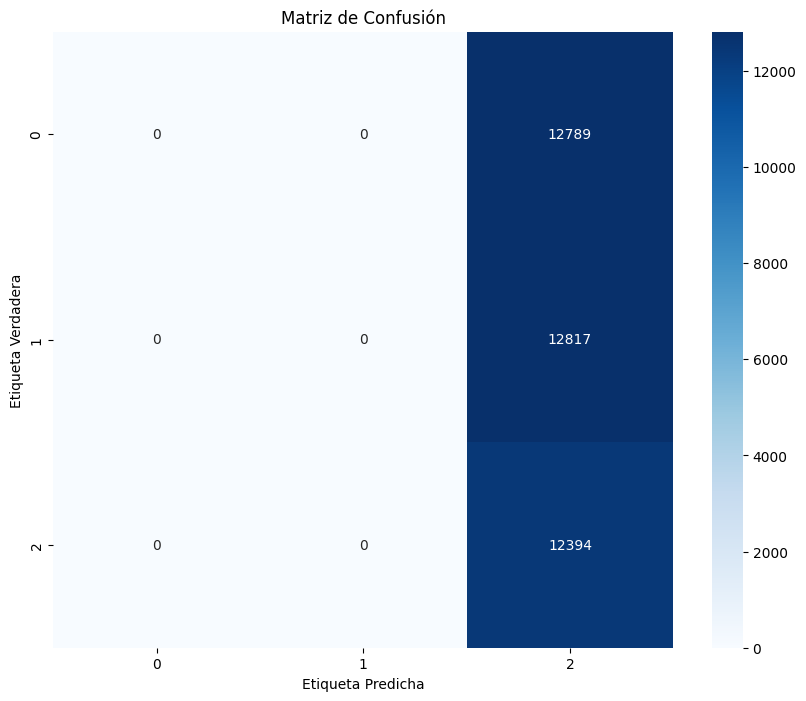

In [134]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

In [135]:
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

<ipython-input-135-f6765c2f3e60>:1: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(cm) / np.sum(cm, axis=0)


In [136]:
print("\nPrecisión por clase:")
for i, move in enumerate(['Piedra', 'Papel', 'Tijera']):
    print(f"{move}: {precision[i]:.4f}")

print("\nRecall por clase:")
for i, move in enumerate(['Piedra', 'Papel', 'Tijera']):
    print(f"{move}: {recall[i]:.4f}")

print("\nPuntuación F1 por clase:")
for i, move in enumerate(['Piedra', 'Papel', 'Tijera']):
    print(f"{move}: {f1_score[i]:.4f}")


Precisión por clase:
Piedra: nan
Papel: nan
Tijera: 0.3262

Recall por clase:
Piedra: 0.0000
Papel: 0.0000
Tijera: 1.0000

Puntuación F1 por clase:
Piedra: nan
Papel: nan
Tijera: 0.4919


In [137]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Gráfico de precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de validación')
    plt.title('Precisión del modelo')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    # Gráfico de pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de validación')
    plt.title('Pérdida del modelo')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

Interpretación de los gráficos:

**Precisión**:

Debería aumentar con el tiempo.
Si la precisión de entrenamiento es mucho mayor que la de validación, puede indicar sobreajuste.
Idealmente, ambas líneas deberían aumentar y converger.


**Pérdida**:

Debería disminuir con el tiempo.
Si la pérdida de entrenamiento es mucho menor que la de validación, puede indicar sobreajuste.
Idealmente, ambas líneas deberían disminuir y converger.



Patrones a observar:

**Aprendizaje saludable:**

Tanto la precisión como la pérdida mejoran constantemente para ambos conjuntos de datos.


**Sobreajuste**:

La precisión/pérdida de entrenamiento mejora, pero la de validación empeora o se estanca.


**Subajuste**:

Ni la precisión ni la pérdida mejoran significativamente.


**Aprendizaje óptimo:**

Las curvas de entrenamiento y validación convergen a un nivel de rendimiento satisfactorio.

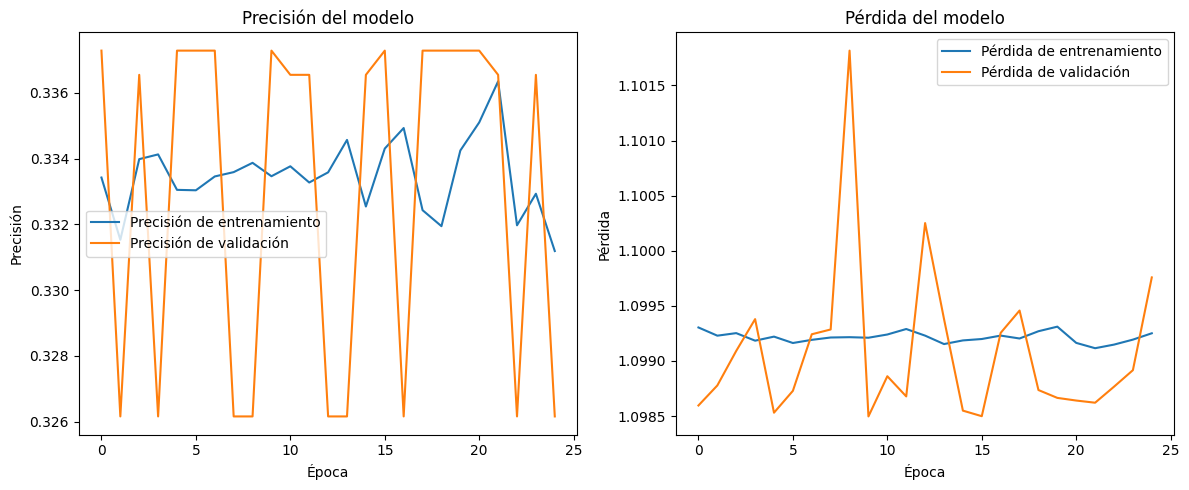

In [138]:
plot_training_history(history)